## _К-кратна крос-валідація_

In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import scale
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, ShuffleSplit

_Вигружаємо данні до датасету_

In [3]:
df = pd.read_csv('petrol_consumption.csv')
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


_Переіменовуємо колинки, для кращого розуміння_

In [4]:
df.columns = ['Податок на бензин','Середній дохід','Протяжність автобамів','Відсоток водійських прав','Розхід палива']
df.head(5)

,Податок на бензин,Середній дохід,Протяжність автобамів,Відсоток водійських прав,Розхід палива
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


_Будуємо ддіаграми розсіювання для даних датасету, для знаходження візуальних  задежностей_

_Будуємо матрицю корелятивних зв'язків між змінними , та виводимо на heatmap_

In [6]:
df_corr = df.corr()
df_corr

,Податок на бензин,Середній дохід,Протяжність автобамів,Відсоток водійських прав,Розхід палива
Податок на бензин,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
Протяжність автобамів,-0.522130,0.050163,1.000000,-0.064129,0.019042
Відсоток водійських прав,-0.288037,0.157070,-0.064129,1.000000,0.698965
Розхід палива,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

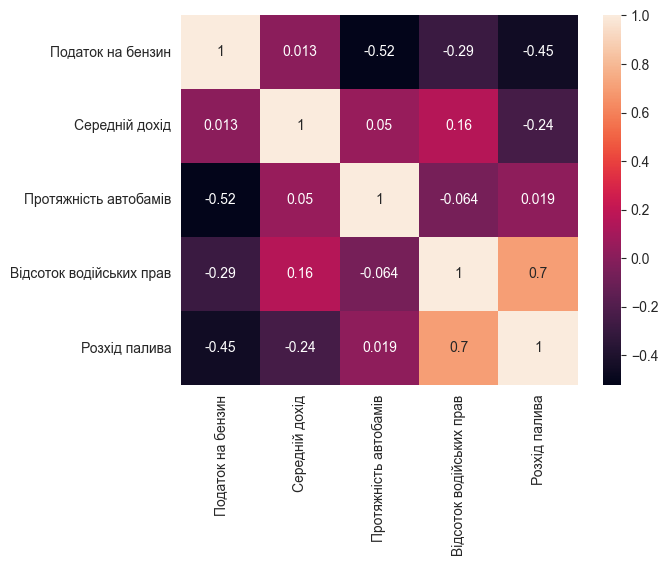

In [7]:
sb.heatmap(df_corr,annot=True)

__На основі цих данних можно зробити висновок, що найбільші корелятивні зв'язки існують між предикторами та  шукомою величиною у (-0.45,-0.24,0.7) відповідно, що є добрим показником.__

___Також є зв'язок між предикторами  "Протяжність автобамів" та "Податок на бензин" (-0.52) . Згідно логіки мали би виключити з датасету серію "Протяжність автобамів",  але емпіричним шляхом виявив , що включення данної серії до навчання моделі, дає кращі показник детермінації.___ 

In [8]:
data = df[['Податок на бензин','Середній дохід','Відсоток водійських прав','Протяжність автобамів']].values
target  = df[['Розхід палива']].values
data_names = ['Податок на бензин','Середній дохід','Відсоток водійських прав','Протяжність автобамів']

X, y = scale(data), target

In [16]:
X.shape

(48, 4)

_Також робимо перевірку на наявність пустих значень_

In [9]:
missing = X == np.NaN
X[missing==True]

array([], dtype=float64)

_Будуємо та навчаємо модель_

In [50]:
model_mlreg = LinearRegression()

In [162]:
kf =ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
for train, test in kf.split(X,y):
    print("%s %s" % (train, test))

[ 2 46 18 15 28 22 16 41 20 42  8 13 25  5 17 35 14 38  1 12 43 24  6 23
 36 21 19  9 39 45  3  0 44] [29  4 26 30 32 37 34 40  7 10 11 31 33 27 47]
[27 45 29 47 12 43 24 40 18 14 44 46  6  3 25  9  7 33  1 31  4 15 17  5
 36 41  0 34 28 11 35 23 10] [30 39 42 32 22 38  2 19 26  8 37 13 20 21 16]
[32 37 20 17 22 14 45 28 38 39 25  2 27 23 26 11 18 10 42  9 21 13 40  3
 29 34 36 46 30  5 31  0 35] [44 47 41 16 12 43  7 33 19 24  8  6 15  4  1]
[35  1 37 41 16 44 23 25 22 11 39 32  4  0 14 29 12 42 43 26 38 31 19  8
 46 34 45  3  2 24 30 13 40] [33 21 17 47 10 18 15  7  5  6  9 36 20 27 28]
[ 7 17 36 14 19  2 28 46 33 43 34 10 20  8 41  0 45 23  5 22 12 44 18  3
 47 24 31  1 29 38 11 15 40] [30 32  4  6 21 35 42 39 26 27 16 25 13 37  9]
[35  2 32 31 18 22  7 29 30  4 20 42 27 43  3 39 17  1  8 16 41 46 11  0
 36 40  5 47 24 45 34 44 33] [ 6 28  9 38 10 19 25 26 21 37 23 14 13 12 15]
[40  4 11 47 38 13  7 34 31 37 23 14 39 41 33  8 19  3 24 30 16 22  0 17
 28 44 27 32 25  9 21 46 29] [15 

In [163]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf)
print(f'Scores for each fold: {score}')
score.mean()

Scores for each fold: [0.29357534 0.52502479 0.74959878 0.79015616 0.62070817 0.41991901
 0.81668481]


0.6022381516650392

In [164]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [165]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-3673.20727069 -6500.9835706  -3141.38239073 -2943.70249104
 -6925.71043972 -3723.33618133 -2220.69157275]
rmse= 64.51


## Висновок

В данному прикладі також  використовую метод ShuffleSplit, оскільки маємо маленьку вибірку , та за допомогою цього метода , є можливість більш тонкої настройки гіперпараметрів для кросс валідації, на відміну від KFold та StratifiedKFold валідації.